## Introdução à Ciência de Dados - KDD e Análise de Dados

### Importação

In [1]:
# Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Gerar dados aleatórios e plotar um histograma (distribuição)
- Gerar 30 valores (1 por dia) com minutos até 60

In [2]:
# Variável 
minutospordia = np.random.randint(0, 60, 30)
minutospordia

array([59, 26, 18, 23, 22, 36,  9, 44, 49, 15,  7,  5, 26, 18, 13, 48, 24,
       37, 30, 44, 48,  3, 22, 28, 13, 38,  1, 57, 43, 50])

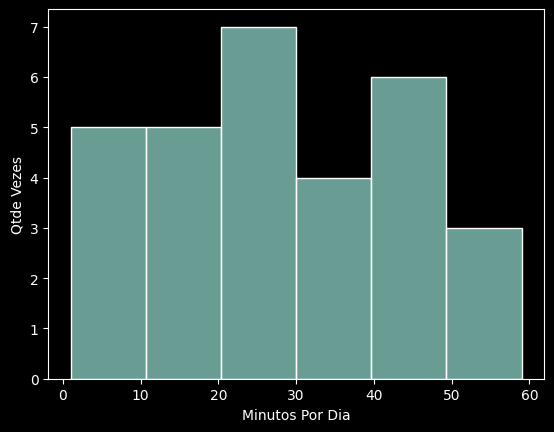

In [3]:
# Gráfico
ax = sns.histplot(minutospordia)
ax.set(xlabel='Minutos Por Dia', ylabel='Qtde Vezes')
plt.show()

### Usando a Biblioteca sweetviz para Análise Exploratória
- pip install git+https://github.com/frank1010111/sweetviz.git@d6f4d8bb98ffddc2123bec57b080ba86fc64c6f8

In [4]:
# Lib
import sweetviz

c:\Introducao-a-DS-UNIVESP\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Carregando uma base dos Jogos de Tenis de 2021
- https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2021.csv

In [5]:
# Base de dados
arquivo = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2021.csv'
dados = pd.read_csv(arquivo)
dados

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2021-0096,Tokyo Olympics,Hard,64,A,20210724,237,126207,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,1228.0,71.0,996.0
1,2021-0096,Tokyo Olympics,Hard,64,A,20210724,238,105526,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,1410.0,95.0,829.0
2,2021-0096,Tokyo Olympics,Hard,64,A,20210724,239,111576,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,160.0,471.0,197.0,354.0
3,2021-0096,Tokyo Olympics,Hard,64,A,20210724,240,105357,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,44.0,1476.0,61.0,1106.0
4,2021-0096,Tokyo Olympics,Hard,64,A,20210724,241,207830,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,145.0,525.0,137.0,570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,2021-9210,Laver Cup,Hard,8,A,20210924,102,126610,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,5173.0,11.0,3368.0
2729,2021-9210,Laver Cup,Hard,8,A,20210924,103,106421,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,10575.0,12.0,3310.0
2730,2021-9210,Laver Cup,Hard,8,A,20210924,104,126094,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6130.0,15.0,2800.0
2731,2021-9210,Laver Cup,Hard,8,A,20210924,105,100644,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7760.0,22.0,2171.0


In [6]:
# Fazendo a análise exploratória
eda = sweetviz.analyze(dados)
eda.show_html()

c:\Introducao-a-DS-UNIVESP\venv\Lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Introducao-a-DS-UNIVESP\venv\Lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: tourney_id                          |▏         | [  2%]   00:00 -> (00:01 left)c:\Introducao-a-DS-UNIVESP\venv\Lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
Feature: tourney_name                        |▍         | [  4%]   00:00 -> (00:04 left)c:\Introduca

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Gerar uma matriz de correlação (de Pearson) de variáveis

In [7]:
# Variável
mask = np.triu(np.ones_like(dados.corr(numeric_only=True), dtype=np.bool_))

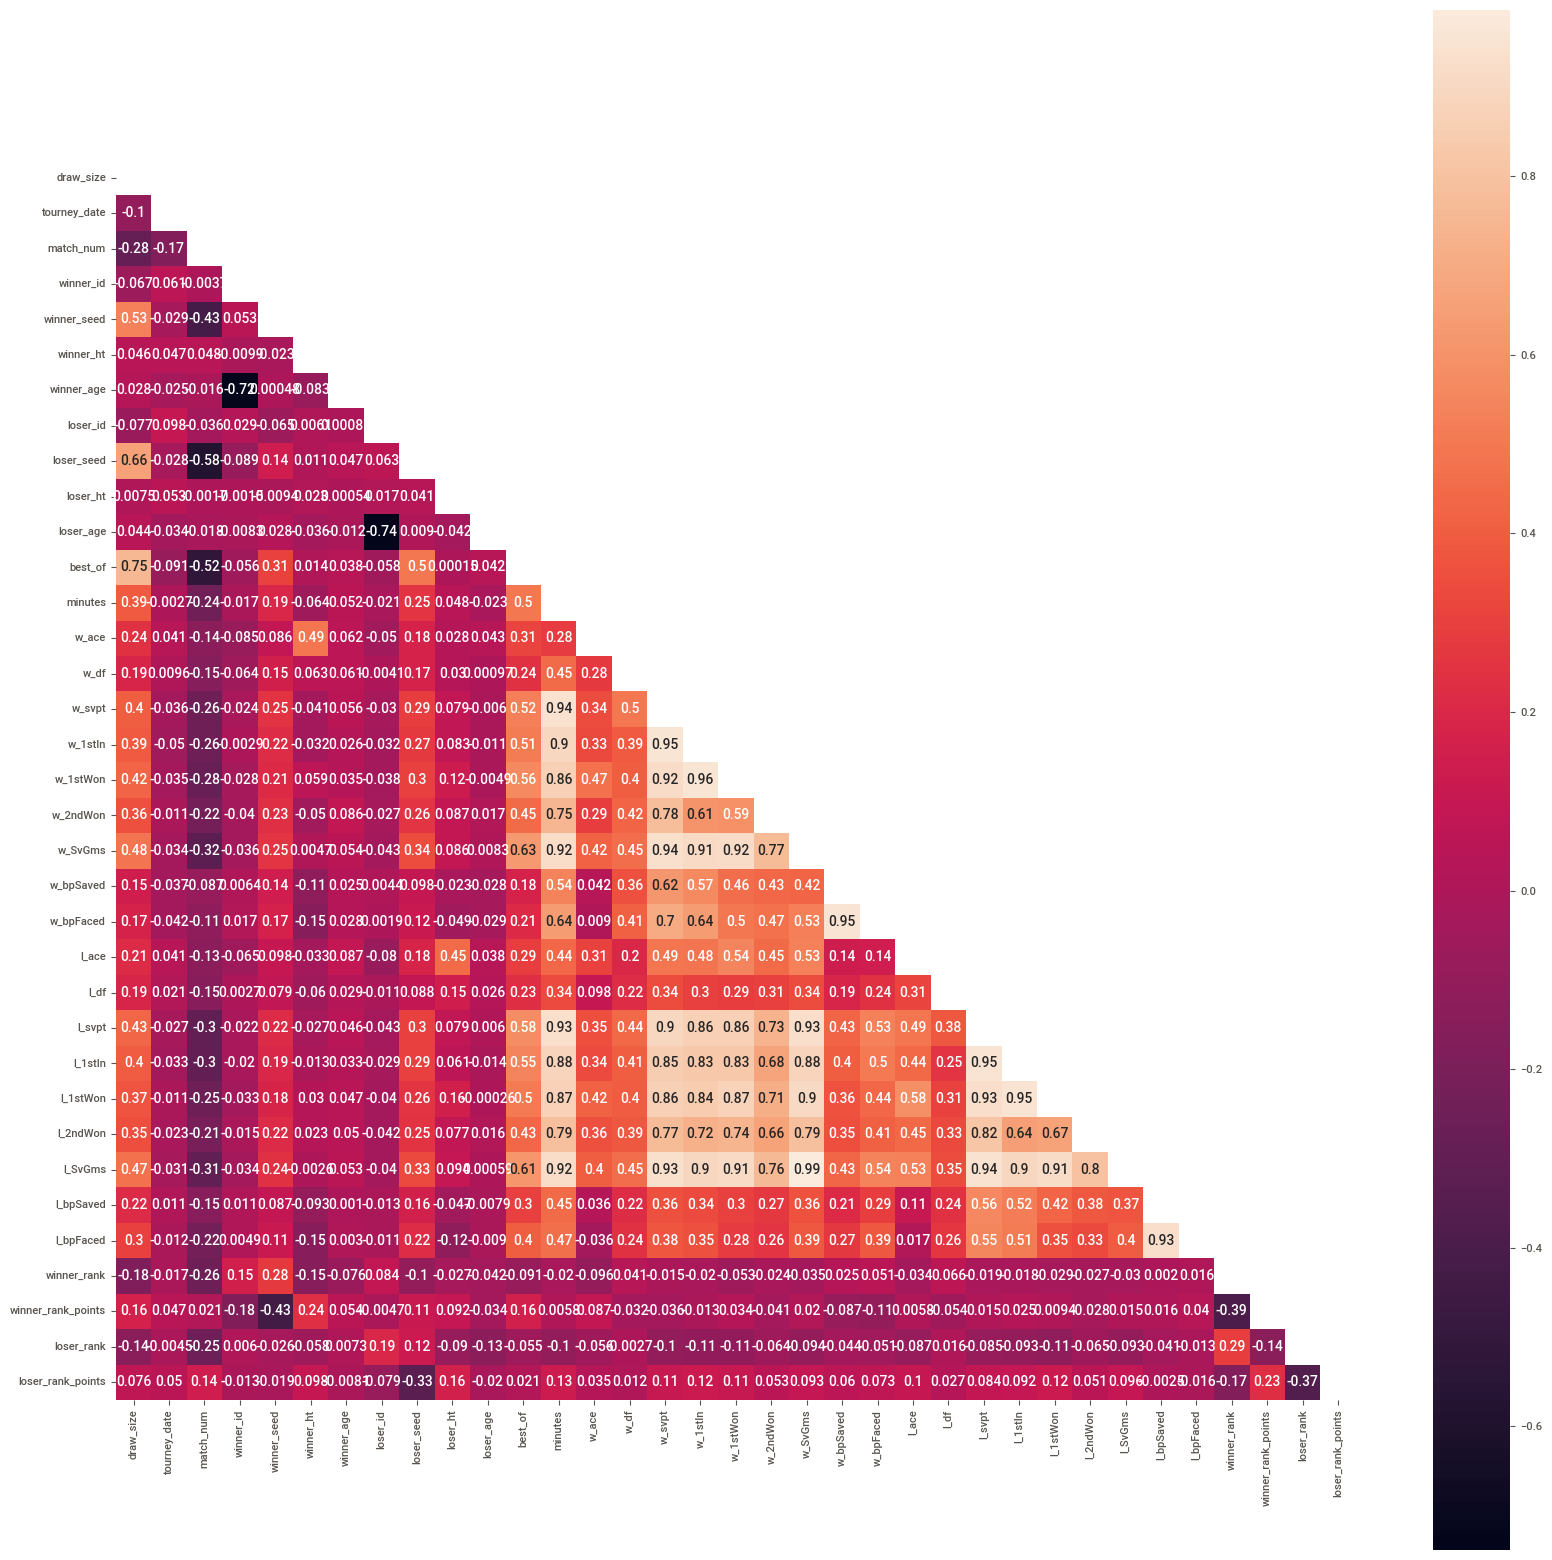

In [8]:
# Gráfico
plt.figure(figsize=(20, 20))
sns.heatmap(dados.corr(numeric_only=True), mask=mask, square=True, annot=True)
plt.show()